#3 1)Prepare the environment

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

#3 2)Pandas read a local csv

In [2]:
df = pd.read_csv("student_grades.csv")

#3 3)Pandas:Sample and summarize

In [3]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


In [4]:
df.shape

(104, 5)

In [5]:
df.describe()

,student_id,exam1,exam2,final_grade
count,104.000000,103.000000,104.000000,104.000000
mean,52.500000,78.543689,77.307692,81.692308
std,30.166206,14.329988,10.295703,10.918122
min,1.000000,57.000000,65.000000,65.000000
25%,26.750000,70.000000,70.000000,72.000000
50%,52.500000,79.000000,75.000000,81.000000
75%,78.250000,92.000000,89.000000,93.000000
max,104.000000,100.000000,93.000000,97.000000


In [7]:
df1=df.describe()
IQR=df1.loc['75%',['exam1','exam2','exam3']]-df1.loc['25%',['exam1','exam2','exam3']]
Range=df1.loc['max',['exam1','exam2','exam3']]-df1.loc['min',['exam1','exam2','exam3']]
print(IQR)
print(Range)

exam1    22.0
exam2    19.0
exam3     NaN
dtype: float64
exam1    43.0
exam2    28.0
exam3     NaN
dtype: float64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
student_id     104 non-null int64
exam1          103 non-null float64
exam2          104 non-null int64
exam3          104 non-null object
final_grade    104 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.1+ KB


#3 4)Ensure no null values

In [11]:
print(df.isnull().sum())

# or
# print(df.columns[df.isnull().any()])

student_id     0
exam1          0
exam2          0
exam3          0
final_grade    0
dtype: int64


In [12]:
# we will create a melted version of train for visualization purposes
df_melted = pd.melt(df, id_vars=['student_id'], value_vars=['exam1','exam2','exam3','final_grade'], 
                    var_name='grade_type', value_name='score')

In [13]:
df_melted.head()

,student_id,grade_type,score
0,1,exam1,100
1,2,exam1,98
2,3,exam1,85
3,4,exam1,83
4,5,exam1,93


In [14]:
df_melted['grade_type'].value_counts()

exam1          104
exam2          104
exam3          104
final_grade    104
Name: grade_type, dtype: int64

In [15]:
df_melted['score'].value_counts(bins=10,sort=False)

(56.956, 61.3]    16
(61.3, 65.6]      40
(65.6, 69.9]       8
(69.9, 74.2]      72
(74.2, 78.5]      56
(78.5, 82.8]      32
(82.8, 87.1]      64
(87.1, 91.4]      24
(91.4, 95.7]      56
(95.7, 100.0]     48
Name: score, dtype: int64

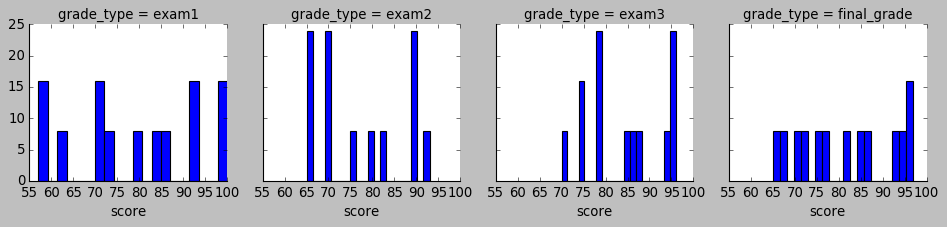

In [16]:
# Histogram
grid = sns.FacetGrid(df_melted, col="grade_type", margin_titles=True)
grid.map(plt.hist, "score", bins=20);

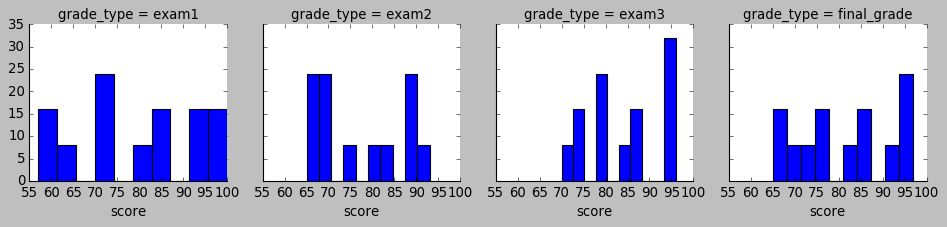

In [17]:
grid = sns.FacetGrid(df_melted, col="grade_type", margin_titles=True)
grid.map(plt.hist, "score", bins=10);

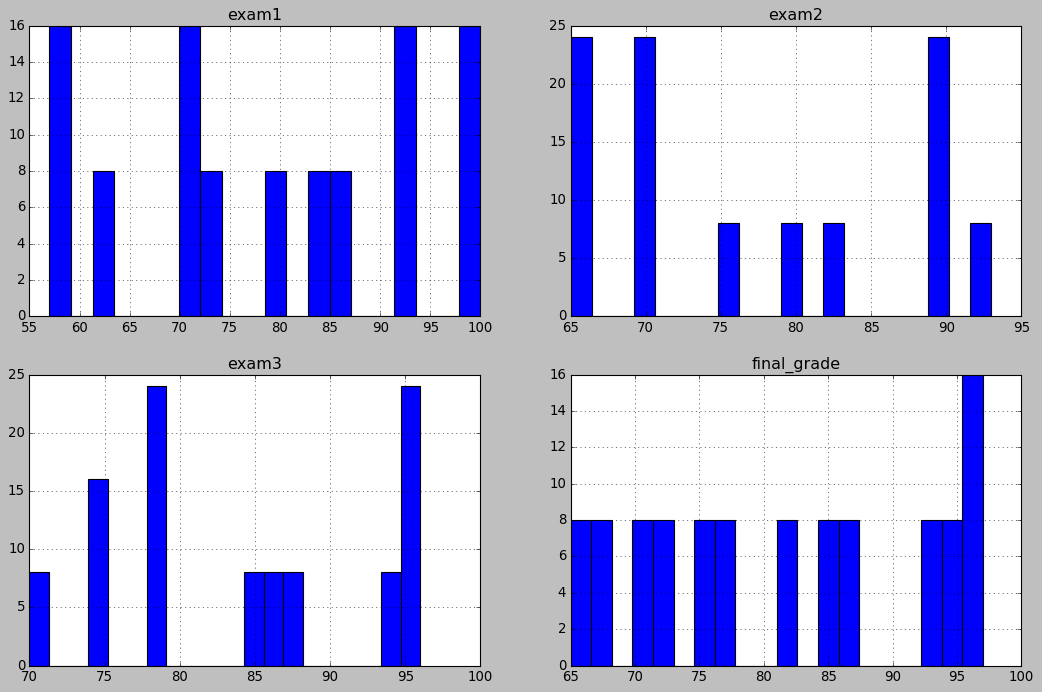

In [18]:
#using Matplotlib with subplots
plt.figure(figsize=(16, 10))

for i, col in enumerate(['exam1', 'exam2', 'exam3', 'final_grade']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(2, 2, plot_number)
    plt.title(col)
    series.hist(bins=20, density=False, cumulative=False, log=False)